<a href="https://colab.research.google.com/github/aditi2259/Anonymous/blob/main/Alzheimer's_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kagglehub tensorflow pandas numpy matplotlib


In [6]:
import kagglehub
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("yasserhessein/dataset-alzheimer")
print("Path to dataset files:", path)

dataset_dir = os.path.join(path, "Alzheimer_s Dataset")


Path to dataset files: /root/.cache/kagglehub/datasets/yasserhessein/dataset-alzheimer/versions/1


In [7]:
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Image preprocessing
image_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_data = image_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = image_gen.flow_from_directory(
    train_dir, # Should be val_dir if you want a seperate validation set
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [10]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Training
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.5016 - loss: 4.4595 - val_accuracy: 0.3089 - val_loss: 1.4301
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.8243 - loss: 0.4860 - val_accuracy: 0.4673 - val_loss: 1.3128
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9813 - loss: 0.1035 - val_accuracy: 0.5396 - val_loss: 1.2904
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.9975 - loss: 0.0260 - val_accuracy: 0.5083 - val_loss: 1.6046
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9997 - loss: 0.0077 - val_accuracy: 0.5621 - val_loss: 1.3453
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.5943 - val_loss: 1.3166
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6178 - val_loss: 1.2648
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 1.0000 - loss: 8.5239e-04 - val_accuracy: 0

In [11]:
test_gen = ImageDataGenerator(rescale=1.0/255.0)
test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 1279 images belonging to 4 classes.
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 700ms/step - accuracy: 0.6050 - loss: 2.0190
Test Accuracy: 61.61%


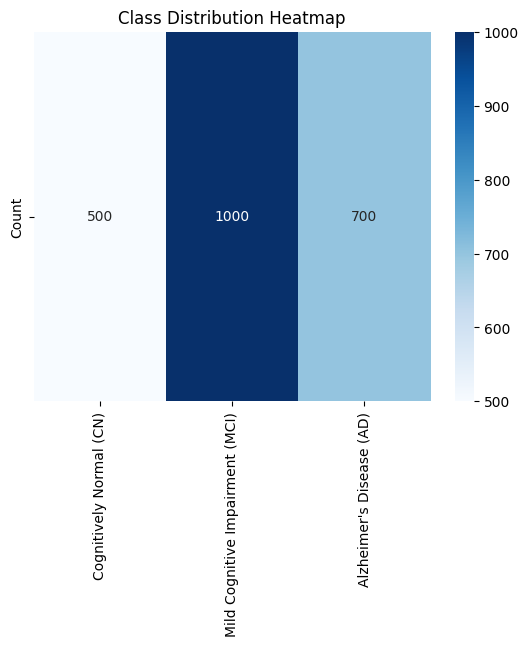

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Class distribution data
class_labels = ['Cognitively Normal (CN)', 'Mild Cognitive Impairment (MCI)', 'Alzheimer\'s Disease (AD)']
class_counts = [500, 1000, 700]  # Replace with actual counts from your dataset

# Create a heatmap
sns.heatmap(
    np.array(class_counts).reshape(1, -1),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=["Count"]
)
plt.title("Class Distribution Heatmap")
plt.show()


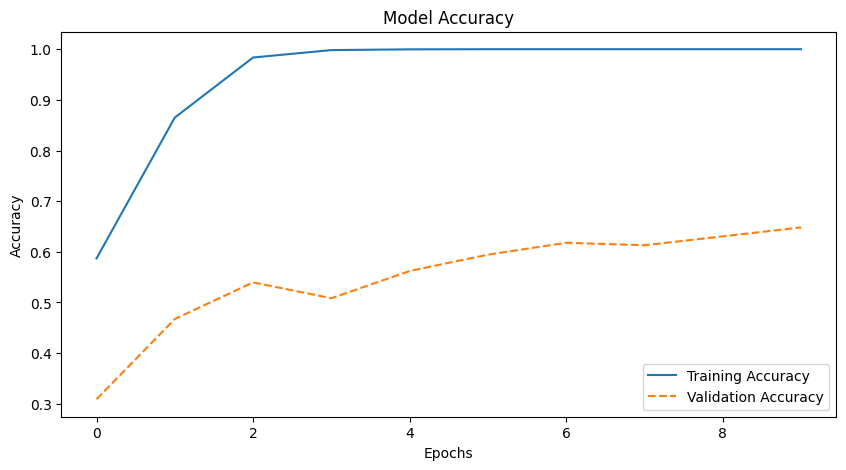

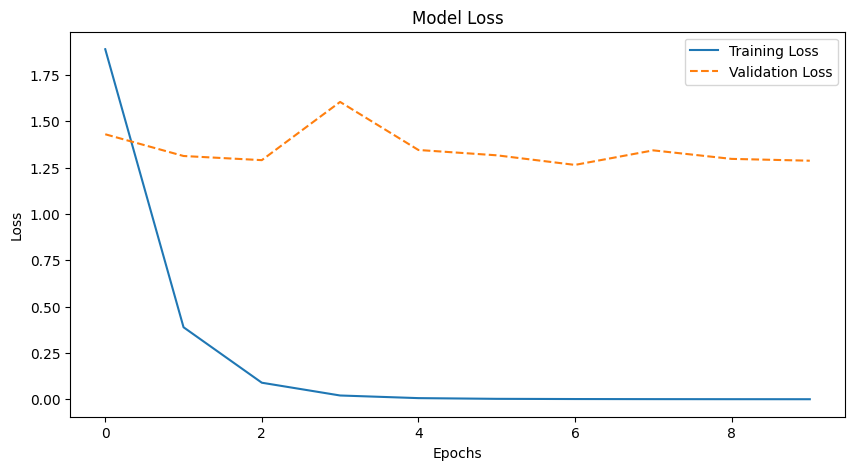

In [26]:
# Example: Assume `history` is the result of `model.fit()`
history_dict = history.history

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


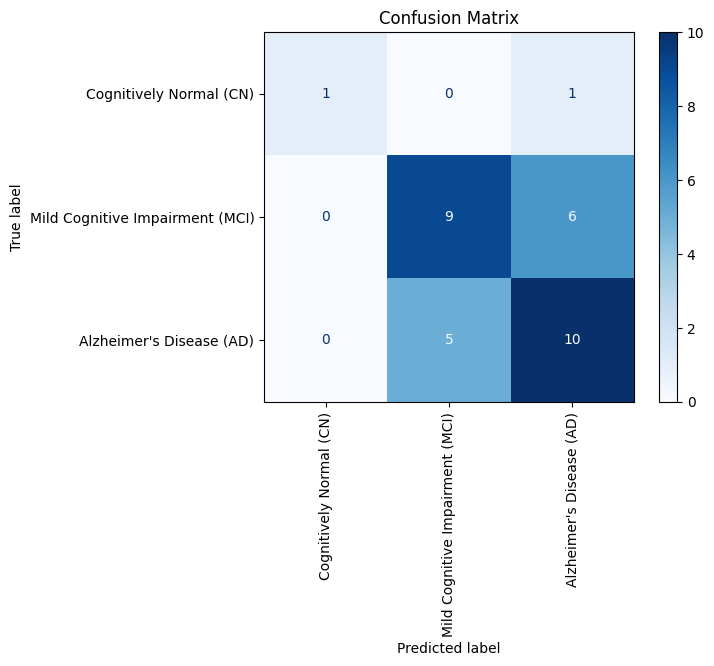

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = labels.argmax(axis=1)
y_pred = model.predict(images).argmax(axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


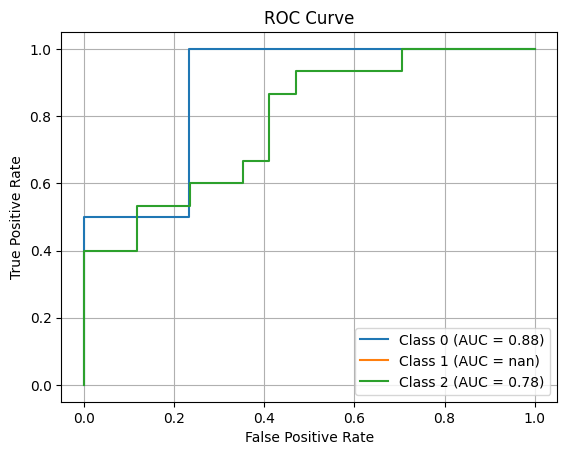

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes = 3
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
y_pred_proba = model.predict(images)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
